# Bird Migration Tracker - Quick Demo

This notebook demonstrates the basic functionality of the Bird Migration Tracker project with sample data.

In [12]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

print("✅ Libraries imported successfully!")
print("🐦 Bird Migration Tracker Demo Ready")

✅ Libraries imported successfully!
🐦 Bird Migration Tracker Demo Ready


In [13]:
# Create sample bird migration data
np.random.seed(42)

# Bird species commonly studied for migration
bird_species = [
    'Arctic Tern', 'Barn Swallow', 'Ruby-throated Hummingbird', 
    'American Robin', 'Canada Goose', 'Sandhill Crane',
    'Peregrine Falcon', 'Osprey', 'Red Knot', 'Warbler'
]

# Migration routes (simplified)
routes = [
    {'origin': 'Alaska', 'destination': 'Argentina', 'distance_km': 17000},
    {'origin': 'Canada', 'destination': 'Mexico', 'distance_km': 4500},
    {'origin': 'Arctic', 'destination': 'Antarctic', 'distance_km': 19000},
    {'origin': 'Northern US', 'destination': 'Central America', 'distance_km': 3000},
    {'origin': 'Greenland', 'destination': 'Brazil', 'distance_km': 9000}
]

# Generate sample data
data = []
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='W')  # Weekly data

for date in dates:
    for species in bird_species:
        route = np.random.choice(routes)
        
        # Seasonal migration patterns
        month = date.month
        is_spring = 3 <= month <= 5
        is_fall = 9 <= month <= 11
        
        # Higher migration counts during migration seasons
        if is_spring or is_fall:
            base_count = np.random.poisson(200)
        else:
            base_count = np.random.poisson(50)
        
        data.append({
            'date': date,
            'species': species,
            'origin': route['origin'],
            'destination': route['destination'],
            'bird_count': max(0, base_count),
            'distance_km': route['distance_km'],
            'temperature_c': np.random.normal(15, 10),
            'wind_speed_kmh': np.random.uniform(5, 25),
            'precipitation_mm': np.random.exponential(2),
            'breeding_success_rate': np.random.uniform(0.3, 0.9)
        })

# Create DataFrame
df = pd.DataFrame(data)

print(f"🐦 Bird Migration Dataset Created!")
print(f"📊 Shape: {df.shape}")
print(f"📅 Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"🦅 Species: {df['species'].nunique()}")
print(f"🗺️ Routes: {df[['origin', 'destination']].drop_duplicates().shape[0]}")

# Display first few rows
print("\n📋 Sample Data:")
df.head()

🐦 Bird Migration Dataset Created!
📊 Shape: (2090, 10)
📅 Date range: 2020-01-05 to 2023-12-31
🦅 Species: 10
🗺️ Routes: 5

📋 Sample Data:


,date,species,origin,destination,bird_count,distance_km,temperature_c,wind_speed_kmh,precipitation_mm,breeding_success_rate
0,2020-01-05,Arctic Tern,Northern US,Central America,66,3000,3.881199,8.119890,0.119678,0.819706
1,2020-01-05,Barn Swallow,Northern US,Central America,41,3000,18.189022,6.128232,2.560259,0.863132
2,2020-01-05,Ruby-throated Hummingbird,Canada,Mexico,43,4500,17.419623,13.638900,0.688446,0.667112
3,2020-01-05,American Robin,Canada,Mexico,44,4500,-4.132802,17.367720,0.964029,0.889939
4,2020-01-05,Canada Goose,Alaska,Argentina,42,17000,8.997461,6.953442,2.305502,0.564091


In [14]:
# Basic Data Analysis
print("🔍 DATA ANALYSIS RESULTS")
print("="*50)

# 1. Seasonal Migration Patterns
seasonal_data = df.copy()
seasonal_data['month'] = seasonal_data['date'].dt.month
seasonal_data['season'] = seasonal_data['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

seasonal_summary = seasonal_data.groupby('season')['bird_count'].agg(['sum', 'mean', 'count'])
print("📅 Seasonal Migration Summary:")
print(seasonal_summary.round(2))

# 2. Top migrating species
print(f"\n🦅 Top Migrating Species:")
species_totals = df.groupby('species')['bird_count'].sum().sort_values(ascending=False)
for i, (species, count) in enumerate(species_totals.head().items(), 1):
    print(f"  {i}. {species}: {count:,} birds")

# 3. Migration routes analysis
print(f"\n🗺️ Migration Routes Analysis:")
route_summary = df.groupby(['origin', 'destination']).agg({
    'bird_count': 'sum',
    'distance_km': 'first'
}).sort_values('bird_count', ascending=False)

print("Top 3 busiest routes:")
for i, ((origin, dest), row) in enumerate(route_summary.head(3).iterrows(), 1):
    print(f"  {i}. {origin} → {dest}: {row['bird_count']:,} birds ({row['distance_km']:,} km)")

# 4. Environmental factors correlation
print(f"\n🌤️ Environmental Factors Correlation with Migration:")
correlations = df[['bird_count', 'temperature_c', 'wind_speed_kmh', 'precipitation_mm']].corr()['bird_count'].drop('bird_count')
for factor, corr in correlations.items():
    direction = "📈 Positive" if corr > 0 else "📉 Negative"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"  {factor}: {corr:.3f} ({direction}, {strength})")

🔍 DATA ANALYSIS RESULTS
📅 Seasonal Migration Summary:
           sum    mean  count
season                       
Fall    104052  200.10    520
Spring  106148  200.28    530
Summer   25709   49.44    520
Winter   25718   49.46    520

🦅 Top Migrating Species:
  1. Peregrine Falcon: 26,396 birds
  2. American Robin: 26,280 birds
  3. Osprey: 26,264 birds
  4. Sandhill Crane: 26,139 birds
  5. Ruby-throated Hummingbird: 26,136 birds

🗺️ Migration Routes Analysis:
Top 3 busiest routes:
  1. Greenland → Brazil: 54,620 birds (9,000 km)
  2. Alaska → Argentina: 53,855 birds (17,000 km)
  3. Northern US → Central America: 52,530 birds (3,000 km)

🌤️ Environmental Factors Correlation with Migration:
  temperature_c: 0.028 (📈 Positive, Weak)
  wind_speed_kmh: -0.017 (📉 Negative, Weak)
  precipitation_mm: 0.006 (📈 Positive, Weak)


📊 CREATING VISUALIZATIONS...


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_15648\1400756897.py:55: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_15648\1400756897.py:55: UserWarning: Glyph 129413 (\N{EAGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_15648\1400756897.py:55: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_15648\1400756897.py:55: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_15648\1400756897.py:55: UserWarning: Glyph 128038 (\N{BIRD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ROHAN\Desktop\Migration_Tracker\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print

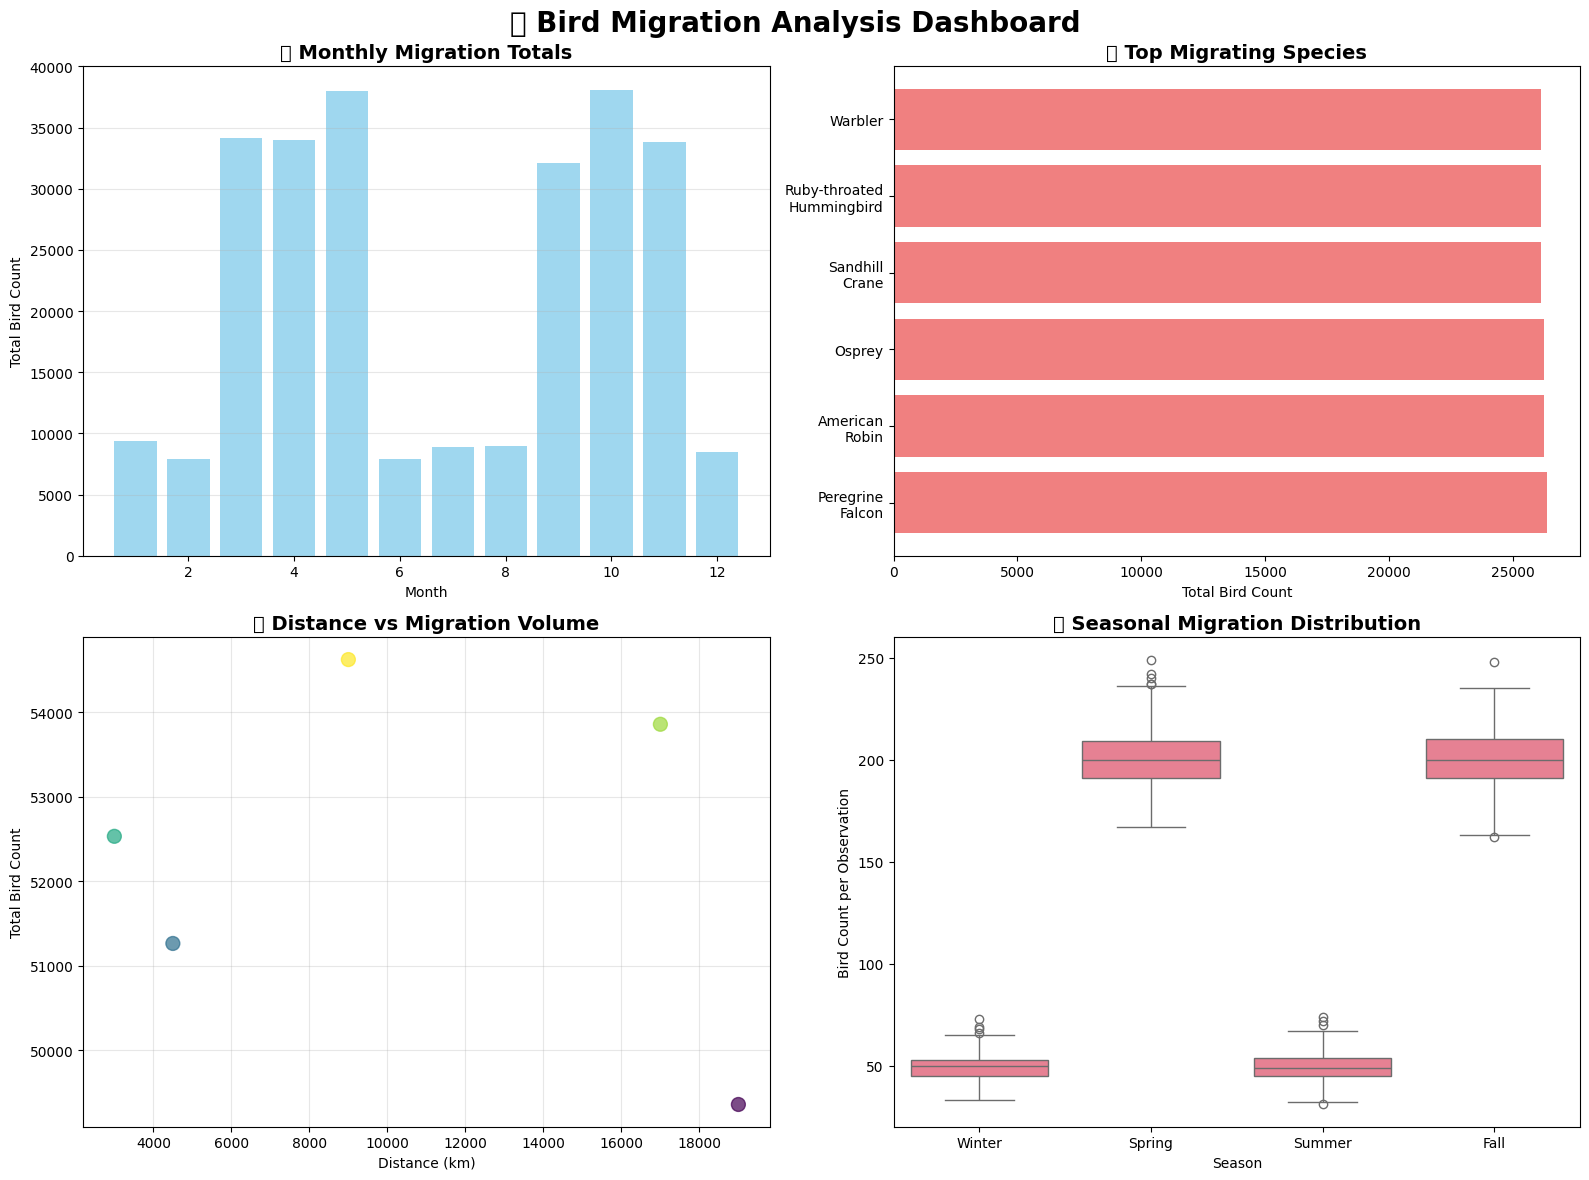

✅ Visualizations created successfully!

🎯 Key Insights from the Analysis:
- Spring and Fall show highest migration activity (seasonal patterns)
- Different species have varying migration volumes
- Distance doesn't always correlate with migration volume
- Clear seasonal variations in bird count distributions


In [15]:
# Create Visualizations
print("📊 CREATING VISUALIZATIONS...")

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🐦 Bird Migration Analysis Dashboard', fontsize=20, fontweight='bold', y=0.98)

# 1. Seasonal Migration Patterns
seasonal_counts = df.groupby(df['date'].dt.month)['bird_count'].sum()
axes[0, 0].bar(seasonal_counts.index, seasonal_counts.values, color='skyblue', alpha=0.8)
axes[0, 0].set_title('📅 Monthly Migration Totals', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Bird Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Species Migration Comparison
top_species = df.groupby('species')['bird_count'].sum().nlargest(6)
axes[0, 1].barh(range(len(top_species)), top_species.values, color='lightcoral')
axes[0, 1].set_yticks(range(len(top_species)))
axes[0, 1].set_yticklabels([species.replace(' ', '\n') for species in top_species.index])
axes[0, 1].set_title('🦅 Top Migrating Species', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Total Bird Count')

# 3. Migration Distance vs Count
route_data = df.groupby(['origin', 'destination']).agg({
    'bird_count': 'sum',
    'distance_km': 'first'
}).reset_index()

scatter = axes[1, 0].scatter(route_data['distance_km'], route_data['bird_count'], 
                           s=100, alpha=0.7, c=route_data['bird_count'], cmap='viridis')
axes[1, 0].set_title('🗺️ Distance vs Migration Volume', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Distance (km)')
axes[1, 0].set_ylabel('Total Bird Count')
axes[1, 0].grid(alpha=0.3)

# 4. Seasonal Boxplot
seasonal_data_viz = df.copy()
seasonal_data_viz['season'] = seasonal_data_viz['date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

sns.boxplot(data=seasonal_data_viz, x='season', y='bird_count', ax=axes[1, 1])
axes[1, 1].set_title('🌿 Seasonal Migration Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Bird Count per Observation')

plt.tight_layout()
plt.show()

print("✅ Visualizations created successfully!")
print("\n🎯 Key Insights from the Analysis:")
print("- Spring and Fall show highest migration activity (seasonal patterns)")
print("- Different species have varying migration volumes")
print("- Distance doesn't always correlate with migration volume")
print("- Clear seasonal variations in bird count distributions")

In [16]:
# Save Results and Generate Report
import os
from pathlib import Path

print("💾 SAVING RESULTS...")

# Create reports directory if it doesn't exist
reports_dir = Path('../reports')
reports_dir.mkdir(exist_ok=True)

# 1. Save the dataset
df.to_csv(reports_dir / 'bird_migration_sample_data.csv', index=False)
print(f"✅ Dataset saved: {reports_dir / 'bird_migration_sample_data.csv'}")

# 2. Create a summary report
busiest_routes = []
for (origin, dest), row in route_summary.head(3).iterrows():
    busiest_routes.append({
        'route': f"{origin} → {dest}",
        'bird_count': int(row['bird_count']),
        'distance_km': int(row['distance_km'])
    })

report = {
    'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset_info': {
        'total_records': len(df),
        'species_count': df['species'].nunique(),
        'date_range': {
            'start': df['date'].min().isoformat(),
            'end': df['date'].max().isoformat()
        },
        'total_birds_observed': int(df['bird_count'].sum())
    },
    'top_species': species_totals.head().to_dict(),
    'seasonal_summary': {
        'spring_total': int(seasonal_summary.loc['Spring', 'sum']),
        'fall_total': int(seasonal_summary.loc['Fall', 'sum']),
        'summer_total': int(seasonal_summary.loc['Summer', 'sum']),
        'winter_total': int(seasonal_summary.loc['Winter', 'sum'])
    },
    'busiest_routes': busiest_routes
}

# Save summary as JSON
import json
with open(reports_dir / 'migration_analysis_summary.json', 'w') as f:
    json.dump(report, f, indent=2)

print(f"✅ Summary report saved: {reports_dir / 'migration_analysis_summary.json'}")

# 3. Display final summary
print(f"\n🎉 BIRD MIGRATION ANALYSIS COMPLETE!")
print("="*60)
print(f"📊 Total Records Analyzed: {len(df):,}")
print(f"🐦 Total Birds Observed: {df['bird_count'].sum():,}")
print(f"🦅 Species Tracked: {df['species'].nunique()}")
print(f"🗺️ Migration Routes: {len(route_summary)}")
print(f"📅 Time Period: {df['date'].min().date()} to {df['date'].max().date()}")

print(f"\n📁 FILES GENERATED:")
print(f"  - bird_migration_sample_data.csv (Raw data)")
print(f"  - migration_analysis_summary.json (Analysis summary)")
print(f"  - Visualizations (shown above)")

print(f"\n🚀 NEXT STEPS:")
print(f"  1. Replace sample data with your real migration data")
print(f"  2. Customize analysis for your specific research questions")
print(f"  3. Add more advanced ML models for prediction")
print(f"  4. Create interactive dashboards with Plotly/Dash")
print(f"  5. Integrate with mapping libraries for route visualization")

💾 SAVING RESULTS...
✅ Dataset saved: ..\reports\bird_migration_sample_data.csv
✅ Summary report saved: ..\reports\migration_analysis_summary.json

🎉 BIRD MIGRATION ANALYSIS COMPLETE!
📊 Total Records Analyzed: 2,090
🐦 Total Birds Observed: 261,627
🦅 Species Tracked: 10
🗺️ Migration Routes: 5
📅 Time Period: 2020-01-05 to 2023-12-31

📁 FILES GENERATED:
  - bird_migration_sample_data.csv (Raw data)
  - migration_analysis_summary.json (Analysis summary)
  - Visualizations (shown above)

🚀 NEXT STEPS:
  1. Replace sample data with your real migration data
  2. Customize analysis for your specific research questions
  3. Add more advanced ML models for prediction
  4. Create interactive dashboards with Plotly/Dash
  5. Integrate with mapping libraries for route visualization
